# Google Playstore Case Study

The team at Google Play Store wants to develop a feature that would enable them to boost visibility for the most promising apps. Now, this analysis would require a preliminary understanding of the features that define a well-performing app. We can ask questions like:
- Does a higher size or price necessarily mean that an app would perform better than the other apps? 
- Or does a higher number of installs give a clear picture of which app would have a better rating than others?

In [2]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#read the dataset and check the first five rows
data=pd.read_csv("googleplaystore_v2.csv") 
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
#Check the shape of the dataframe
data.shape

(10841, 13)

# Data Handling and Cleaning
The first few steps involve making sure that there are no missing values or incorrect data types before we proceed to the analysis stage. These aforementioned problems are handled as follows:

- For Missing Values: Some common techniques to treat this issue are

        - Dropping the rows containing the missing values
        - Imputing the missing values
        - Keep the missing values if they don't affect the analysis

- Incorrect Data Types:

        - Clean certain values
        - Clean and convert an entire column

In [5]:
#Check the datatypes of all the columns of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB



# Missing values Handling


In [6]:
#Check the number of null values in the columns
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

#### "Rating" Clumn

In [7]:
#Drop the rows having null values in the Rating field
data=data[~(data["Rating"].isnull())]

In [8]:
# Check the number of nulls in the Rating field again to cross-verify
data["Rating"].isnull().sum()   

0

In [9]:
data.shape   # earlier it was (10841,13) ----> 1474 records gone

(9367, 13)

In [10]:
#Checking the number of nulls in the dataframe again and find the total number of null values
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

#### "Android Ver" column

In [11]:
#Inspect the nulls in the Android Version column

data[data["Android Ver"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [12]:
# As we observed row 10472 has some problem as value gets shifted,so its better to remove this row fully
# lets extract that row

data[(data["Android Ver"].isnull()) & (data["Category"] == "1.9")]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [13]:
# Dropping row 10472

data=data[~((data["Android Ver"].isnull()) & (data["Category"] == "1.9"))]     

In [14]:
data[data['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


Now,only two misisng values is there
- one way to impute missing values for the categorical variable is to use mode. 



In [15]:
#Check the most common value in the Android version column
data["Android Ver"].value_counts()

4.1 and up            2059
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1131
4.4 and up             875
2.3 and up             582
5.0 and up             535
4.2 and up             338
2.3.3 and up           240
3.0 and up             211
2.2 and up             208
4.3 and up             207
2.1 and up             113
1.6 and up              87
6.0 and up              48
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              16
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
Name: Android Ver, dtype: int64

In [16]:
#Fill up the nulls in the Android Version column with the above value
data["Android Ver"]=data["Android Ver"].fillna(data["Android Ver"].mode()[0])

In [17]:
#Check the nulls in the Android version column again to cross-verify
data["Android Ver"].isnull().sum()


0

In [18]:
#Check the nulls in the entire dataframe again
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       0
dtype: int64

#### "Current Ver" column

In [19]:
#Check the most common value in the Current version column
data["Current Ver"].value_counts()

Varies with device    1415
1.0                    458
1.1                    195
1.2                    126
1.3                    120
                      ... 
2.9.10                   1
3.18.5                   1
1.3.A.2.9                1
9.9.1.1910               1
0.3.4                    1
Name: Current Ver, Length: 2638, dtype: int64

In [20]:
#Replace the nulls in the Current version column with the above value
data["Current Ver"]=data["Current Ver"].fillna(data["Current Ver"].mode()[0])

In [21]:
#Check the nulls in the Android version column again to cross-verify
data["Current Ver"].isnull().sum()

0

In [22]:
#Check the nulls in the entire dataframe again
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

# Handling Incorrect Datatype

In [23]:
#Check the datatypes of all the columns 
data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

 #### "Price" Column

In [24]:
#Analyse the Price column to check the issue
data["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

In [25]:
#Write the function to make the changes
data["Price"]=data["Price"].apply(lambda x:0 if x=="0" else x[1:]).astype(float)    

In [26]:
#Verify the dtype of Price once again
data["Price"].dtype

dtype('float64')

#### "Reviews" column

In [27]:
data["Reviews"].dtype

dtype('O')

In [28]:
#Analyse the Reviews column
data["Reviews"].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [29]:
data["Reviews"].value_counts()

2         83
3         78
4         74
5         74
1         67
          ..
49657      1
41420      1
7146       1
44706      1
398307     1
Name: Reviews, Length: 5992, dtype: int64

In [30]:
#Change the dtype of this column
data["Reviews"]=data["Reviews"].astype("int")          

In [31]:
#Verify the dtype of Price once again
data["Reviews"].dtype

dtype('int32')

#### "Installs" column 

In [32]:
# checking datatype
data["Installs"].dtypes

dtype('O')

In [33]:
#Analyse the Reviews column
data["Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

In [34]:
#Write the function to make the changes
data["Installs"]=data["Installs"].apply(lambda x: x.replace(",","").rstrip("+"))

In [35]:
#Change the dtype of this column
data["Installs"]=data["Installs"].astype(int)

In [36]:
#Verify the dtype of Price once again
data["Installs"].dtype

dtype('int32')

# Sanity Checks

The data that we have needs to make sense and therefore you can perform certain sanity checks on them to ensure they are factually correct as well. Some sanity checks can be:

     - Rating is between 1 and 5 for all apps.
     - Number of Reviews is less than or equal to the number of Installs.
     - Free Apps shouldn’t have a price greater than 0.

##### "Rating"  

In [37]:
data["Rating"].describe()          

count    9366.000000
mean        4.191757
std         0.515219
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

"Rating" column seems fine as if we look its min and max ratings its lies between 1 and 5

###### Installs>= Reviews

During a sanity check, the number of reviews should be less than or equal to the number of installs. This is because not every user who installs an application or uses a service may leave a review. 
If the number of reviews significantly exceeds the number of installs, it might indicate an issue, such as potential fake reviews or a skewed data collection process.

In [38]:
#perform the sanity checks
data[data["Reviews"]>data["Installs"]]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.000000,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516.529524,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.000000,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.000000,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.000000,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.000000,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.000000,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [39]:
# Dropping these records from the data as it fails in sanity checks
data=data[~(data["Reviews"]>data["Installs"])]

#### "Price" column

For Free apps Price should not be more than 0

In [40]:
data[(data["Type"]=="Free") & (data["Price"]>0)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


As there is no such record ,means data is fine

# Identifying and Handling Outliers/Extreme Values

Now that we have performed the sanity checks, it’s time to finally turn our attention to identifying and removing extreme values or outliers from the dataset. These values can tilt our analysis and often provide us with a biased perspective of the data available. 

#### "Price" Column

In [41]:
data["Price"].describe()

count    9359.000000
mean        0.961116
std        15.822478
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

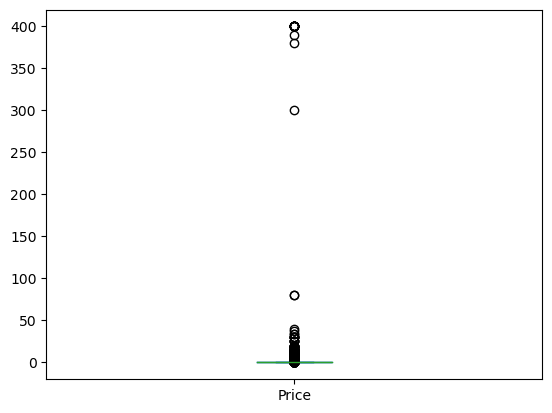

In [42]:
#Create a box plot for paid apps
data["Price"].plot.box()
plt.show()

In [43]:
# checking out the records where price more that 200$
data[data["Price"]>200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


On further inspection, you observed that a lot of junk apps with 'I am rich' string having those outlier values.
these records seems suspious and not reliable as no app is such where we have to pay very costly 400 dollar or somthing so remove them

In [44]:
# Drop the records where price more that 200$
data=data[~(data["Price"]>200)]

In [45]:
data["Price"].describe()

count    9344.000000
mean        0.334463
std         2.169925
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        79.990000
Name: Price, dtype: float64

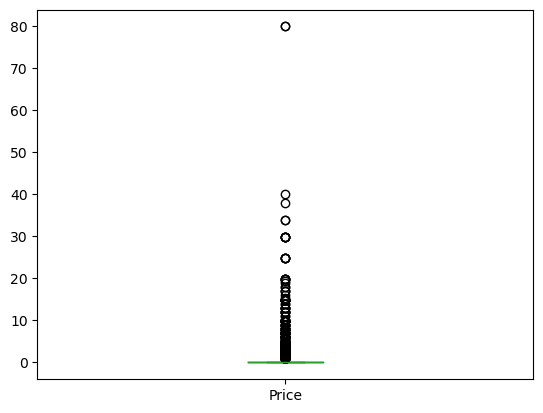

In [46]:
# checking and observing box plot again
data["Price"].plot.box()
plt.show()

In [47]:
#Check the apps with price more than 30
data[data["Price"]>30]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2253,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000.0,1000,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
2301,A Manual of Acupuncture,MEDICAL,3.5,214,68000.0,1000,Paid,33.99,Everyone,Medical,"October 2, 2017",2.1.35,4.0 and up
2365,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000.0,1000,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
2402,A Manual of Acupuncture,MEDICAL,3.5,214,68000.0,1000,Paid,33.99,Everyone,Medical,"October 2, 2017",2.1.35,4.0 and up
2414,LTC AS Legal,MEDICAL,4.0,6,1300.0,100,Paid,39.99,Everyone,Medical,"April 4, 2018",3.0.1,4.1 and up
5360,I am Rich Person,LIFESTYLE,4.2,134,1800.0,1000,Paid,37.99,Everyone,Lifestyle,"July 18, 2017",1.0,4.0.3 and up


In [48]:
#Cleaning the Price column further
data=data[~(data["Price"]>30)]

In [49]:
data.shape   # so we left with 9338 rows only

(9338, 13)

#### "Reviews"  column


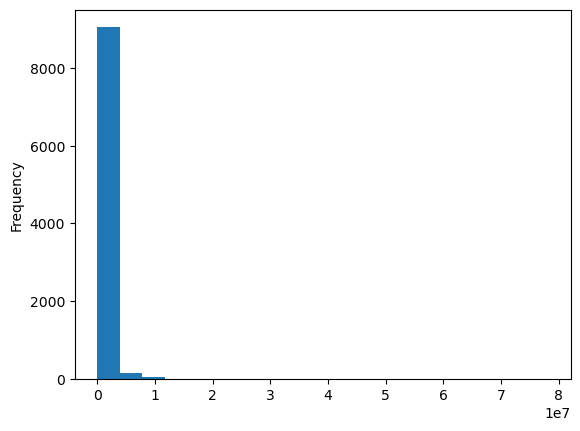

In [50]:
#Create a histogram of the Reviews
data["Reviews"].plot.hist(bins=20)
plt.show()

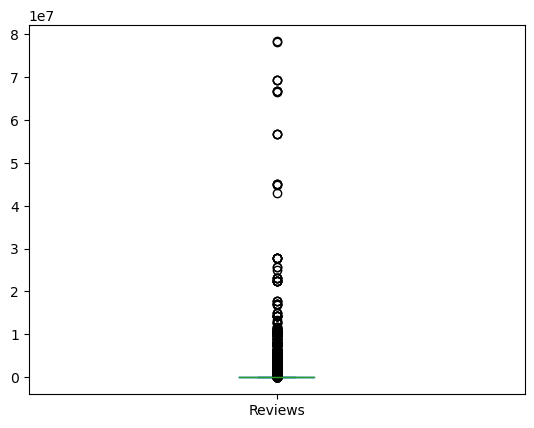

In [51]:
#Create a boxplot of the Reviews column
data["Reviews"].plot.box()
plt.show()

In [52]:
#Check records with 1 or more than 1 million reviews
data[data["Reviews"]>=1000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
139,Wattpad 📖 Free Books,BOOKS_AND_REFERENCE,4.6,2914724,21516.529524,100000000,Free,0.0,Teen,Books & Reference,"August 1, 2018",Varies with device,Varies with device
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,21516.529524,1000000000,Free,0.0,Teen,Books & Reference,"August 3, 2018",Varies with device,Varies with device
189,Uber Driver,BUSINESS,4.4,1254730,21516.529524,10000000,Free,0.0,Everyone,Business,"August 3, 2018",Varies with device,Varies with device
194,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.3,1002861,35000.000000,100000000,Free,0.0,Everyone,Business,"August 2, 2018",9.7.14188,4.1 and up
201,Facebook Pages Manager,BUSINESS,4.0,1279184,21516.529524,50000000,Free,0.0,Everyone,Business,"August 2, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10190,Fallout Shelter,FAMILY,4.6,2721923,25000.000000,10000000,Free,0.0,Teen,Simulation,"June 11, 2018",1.13.12,4.1 and up
10200,Facebook Pages Manager,BUSINESS,4.0,1279800,21516.529524,50000000,Free,0.0,Everyone,Business,"August 6, 2018",Varies with device,Varies with device
10327,Garena Free Fire,GAME,4.5,5534114,53000.000000,100000000,Free,0.0,Teen,Action,"August 3, 2018",1.21.0,4.0.3 and up
10636,FRONTLINE COMMANDO,GAME,4.4,1351833,12000.000000,10000000,Free,0.0,Teen,Action,"October 28, 2013",3.0.3,2.1 and up


This revealed that lots of pre-installed and superstar apps are present in the data. These apps won’t be useful for our analysis since they already have skewed statistics (an extremely high number of installs and reviews), which is not common for a majority of the rest of the apps. Hence, you took a qualifier of 1 million reviews and removed all the apps having more reviews.

In [53]:
#Drop the above records
data=data[~(data["Reviews"]>=1000000)]

In [54]:
# check the shape of the DataFrame after dropping
data.shape

(8634, 13)

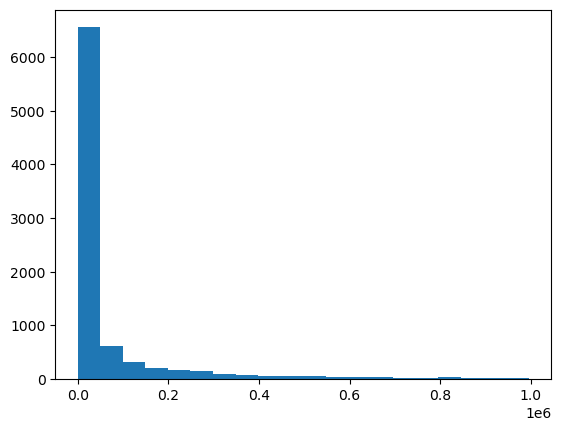

In [55]:
# creating a histogram again for Reviews column
plt.hist(data["Reviews"],bins=20)
plt.show()

We can observe that the peak is still at the beginning.

In [56]:
data["Reviews"].describe()

count      8634.000000
mean      68383.348853
std      156335.806417
min           1.000000
25%         143.250000
50%        3641.000000
75%       46070.500000
max      995002.000000
Name: Reviews, dtype: float64

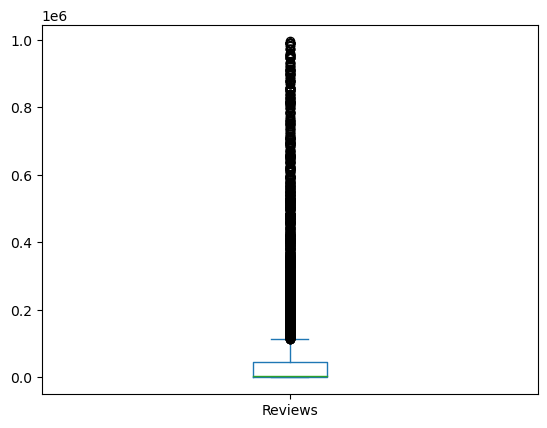

In [57]:
# Create a box plot for the Reviews column 
data["Reviews"].plot.box()
plt.show()

In [58]:
data.shape

(8634, 13)

#### "Installs" column

In [59]:
data["Installs"].describe()

count    8.634000e+03
mean     4.288536e+06
std      2.864650e+07
min      5.000000e+00
25%      1.000000e+04
50%      1.000000e+05
75%      1.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

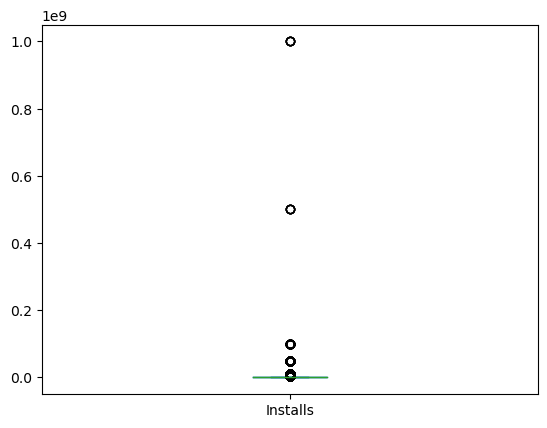

In [60]:
# Box plot for "Installs" column
data["Installs"].plot.box()
plt.show()

In [61]:
# Checking the records more than or equal to 100 million installs
data[data["Installs"]>=100000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
143,Amazon Kindle,BOOKS_AND_REFERENCE,4.2,814080,21516.529524,100000000,Free,0.0,Teen,Books & Reference,"July 27, 2018",Varies with device,Varies with device
346,imo beta free calls and text,COMMUNICATION,4.3,659395,11000.000000,100000000,Free,0.0,Everyone,Communication,"June 7, 2018",9.8.000000010492,4.0 and up
369,Android Messages,COMMUNICATION,4.2,781810,21516.529524,100000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
396,Android Messages,COMMUNICATION,4.2,781810,21516.529524,100000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
888,IMDb Movies & TV,ENTERTAINMENT,4.2,501498,12000.000000,100000000,Free,0.0,Teen,Entertainment,"July 26, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8628,Google Docs,PRODUCTIVITY,4.3,815974,21516.529524,100000000,Free,0.0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8636,Google Keep,PRODUCTIVITY,4.4,691474,21516.529524,100000000,Free,0.0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
9844,Google News,NEWS_AND_MAGAZINES,3.9,878065,13000.000000,1000000000,Free,0.0,Teen,News & Magazines,"August 1, 2018",5.2.0,4.4 and up
10253,File Commander - File Manager/Explorer,BUSINESS,4.3,758590,12000.000000,100000000,Free,0.0,Everyone,Business,"August 2, 2018",Varies with device,4.1 and up


In [62]:
# CLean by removing all the apps having more than or equal to 100 million installs
data=data[~(data["Installs"]>=100000000)]

#### "Size" Column

In [63]:
data["Size"].describe()

count      8573.000000
mean      21625.064264
std       20712.753555
min           8.500000
25%        6000.000000
50%       18000.000000
75%       26000.000000
max      100000.000000
Name: Size, dtype: float64

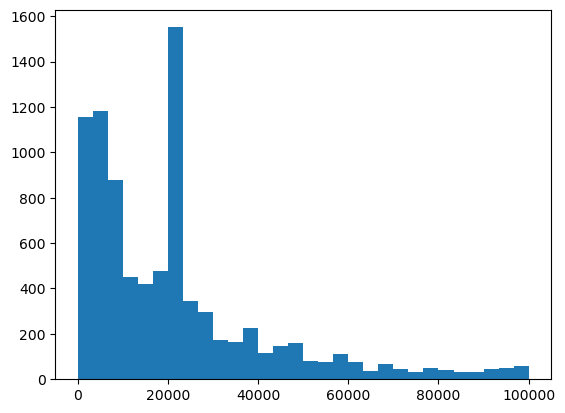

In [64]:
#Plot a histogram for Size as well.
plt.hist(data["Size"],bins=30)
plt.show()

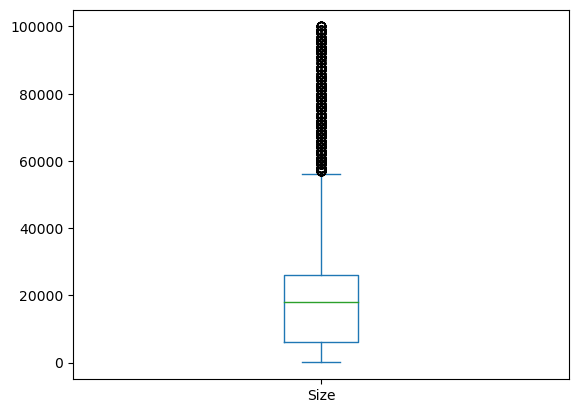

In [65]:
data["Size"].plot.box()
plt.show()

In [66]:
data.shape

(8573, 13)

# Distribution Chart

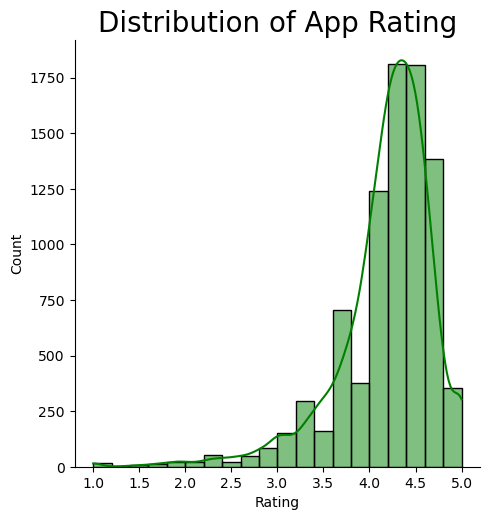

In [67]:
# distribution plot for rating

sns.displot(data["Rating"],bins=20,kde=True,color="Green")
plt.title("Distribution of App Rating",fontsize=20)
plt.show()

It means that If people dislike an app, they don’t generally wait to give it bad ratings; rather, they go ahead and remove it immediately. Therefore, the average ratings of the apps are pretty high.

## Pie - Chart and Bar Chart

In [68]:
#Analyse the Content Rating column
data["Content Rating"].value_counts()

Everyone           6898
Teen                918
Mature 17+          417
Everyone 10+        336
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

In [69]:
#Remove the rows with values which are less represented 
data=data[~(data["Content Rating"].isin(["Adults only 18+","Unrated"]))]

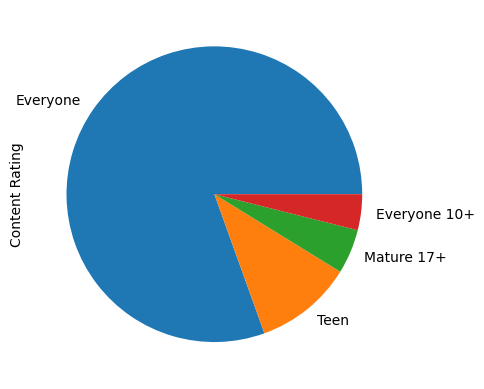

In [70]:
#Plot a pie chart
data["Content Rating"].value_counts().plot.pie()
plt.show()

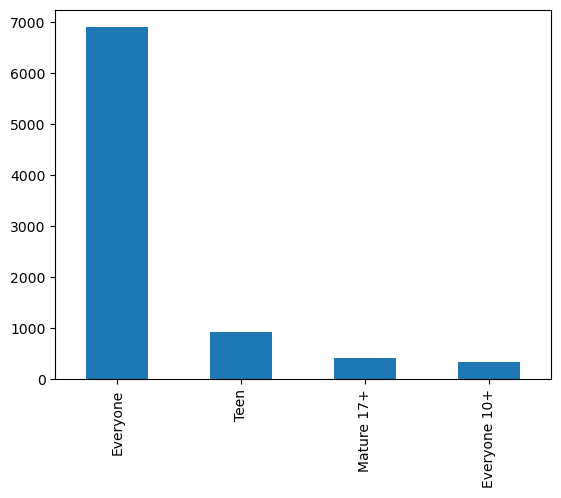

In [71]:
#Plot a bar chart
data["Content Rating"].value_counts().plot.bar()              
plt.show()

# Scatter Plots

#### "Size" Vs "Rating"

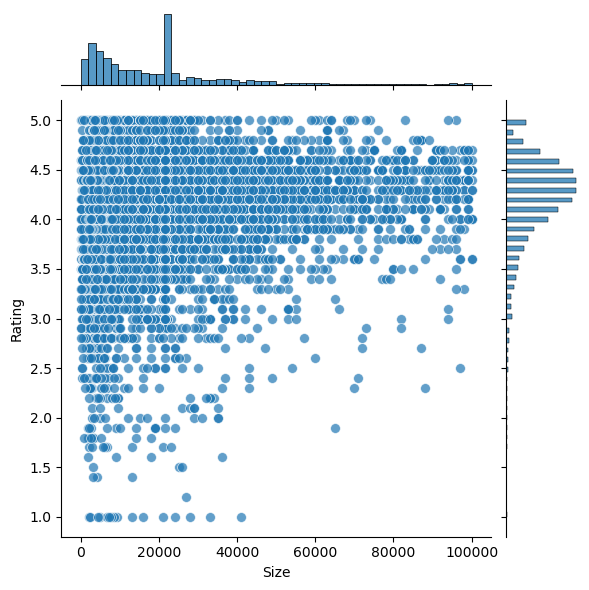

In [72]:
sns.jointplot(x="Size",y="Rating",data=data,alpha=0.7,s=50)
plt.show()


From the graph ,There is not a Strong Pattern,its a weak general trend

But roughly we can say that Heavier the app size is, higher the chances of rating being more

#### "Rating" Vs "Price"

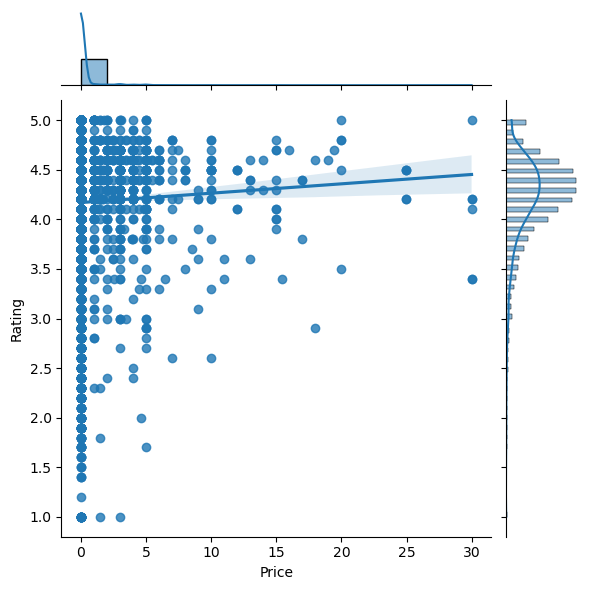

In [73]:
sns.jointplot(x=data["Price"],y=data["Rating"],kind="reg")
plt.show()

The regression line does seems to have a positive slope hinting us that in general if the price increase rating can also be expected to increase

# Pair Plot

Pair Plots help in identifying the trends between a target variable and the predictor variables pretty quickly

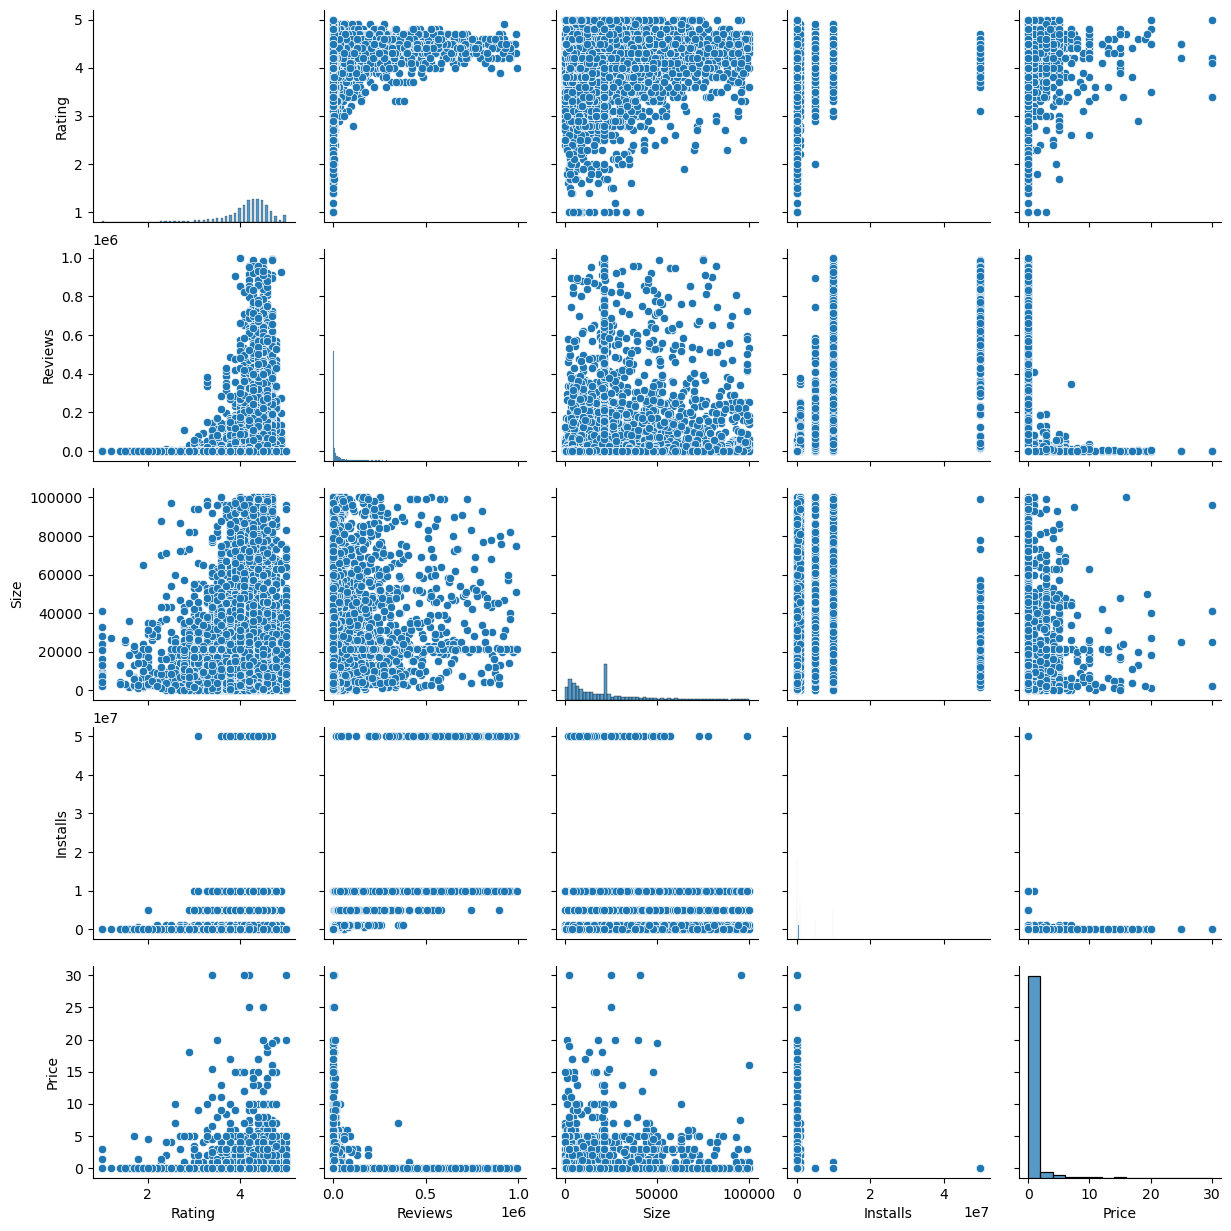

In [74]:
sns.pairplot(data)         
plt.show()               

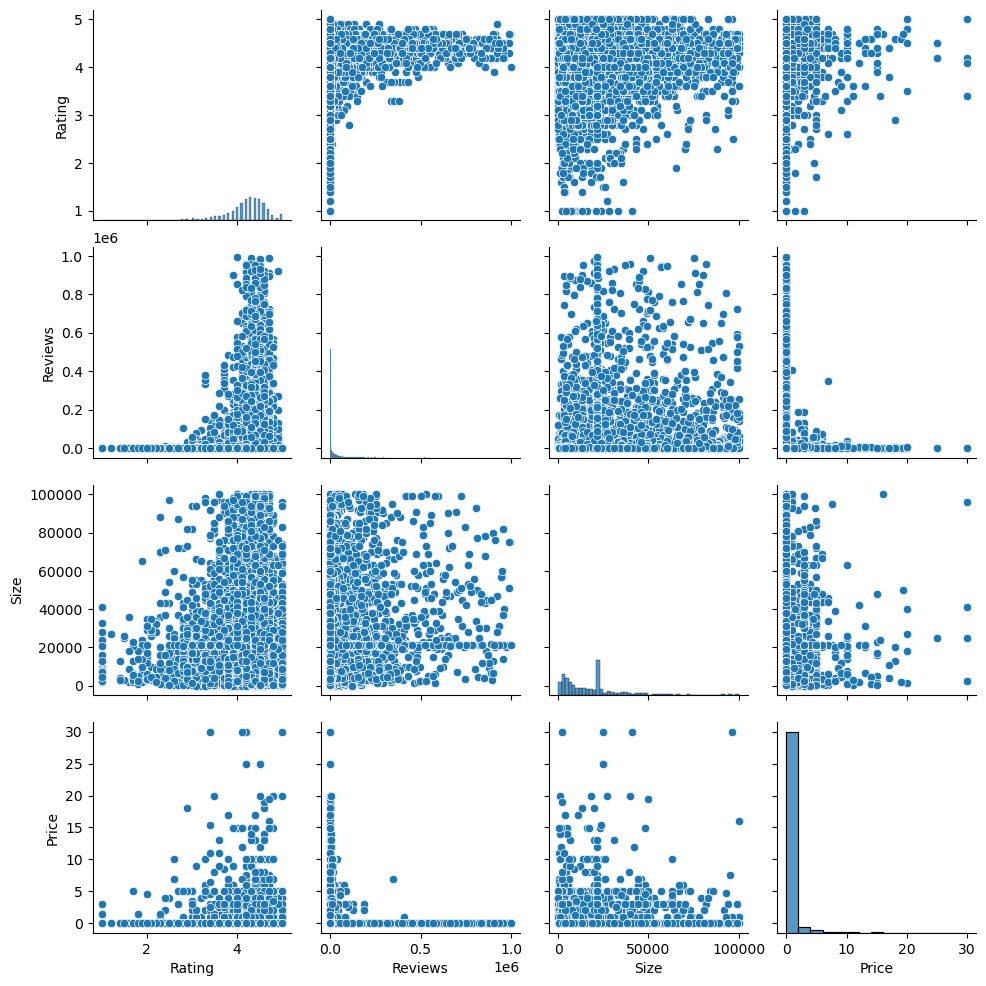

In [75]:
# pairplot for specific columns

sns.pairplot(data[["Rating","Reviews","Size","Price"]])      
plt.show()

# Bar Graph

"Content Rating" Vs "Rating" i.e ( Categorial Vs Numerical)

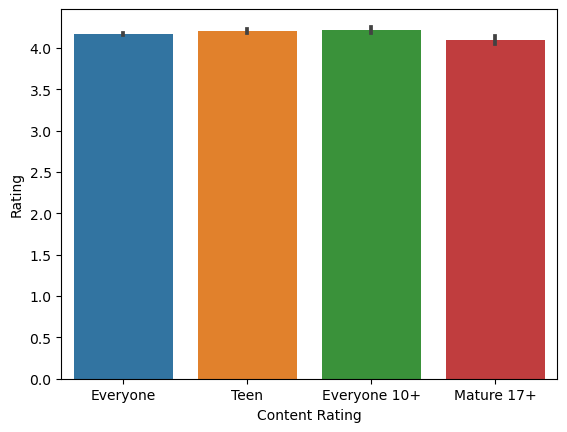

In [76]:
#Plot a bar plot of Content Rating vs Average Rating 
sns.barplot(x=data["Content Rating"], y=data["Rating"], estimator=np.mean)
plt.show()

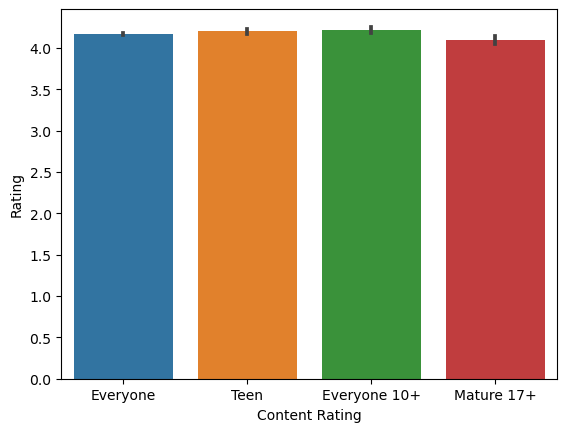

In [77]:
# we are not able to differtiate through its mean values,lets try out with median 

# Plot the bar plot again with Median Rating
sns.barplot(x=data["Content Rating"], y=data["Rating"], estimator=np.mean)
plt.show()

In [78]:
# still we are not able to differntiate with median values as well
# Using the estimator function, you can observe the values at different percentiles and compare the different categories.

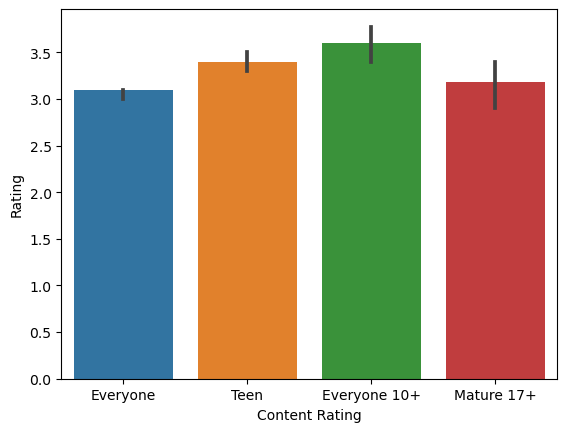

In [79]:
#Plotting the bar plot with only the 5th percentile of Ratings using the estimator parameter
sns.barplot(x=data["Content Rating"], y=data["Rating"], estimator=lambda x: np.percentile(x, 5))
plt.show()

Since taking just the average did not give us any insight, we decided to use the median metric.And still a median value also did not prove to be a good differentiator for the categories being analysed.

Now, this is where we  utilised Seaborn’s estimator function to create bar graphs for different metrics (other than the median and mean). In this case, we used the value at the 5th percentile to compare the categories and utilised the following estimator function for it

# Box Plot

 Apart from outlier analysis, box plots are great at comparing the spread and analysing a numerical variable across several categories

#### "Rating" vs "Content Rating"

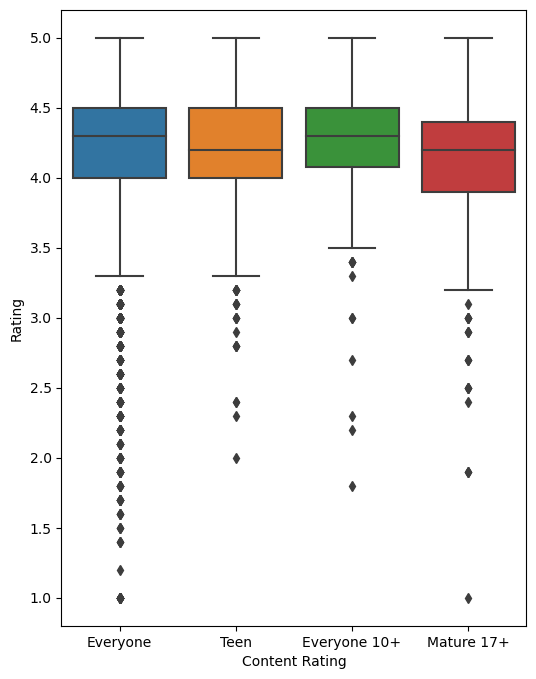

In [80]:
# Plot a box plot of Rating vs Content Rating

plt.figure(figsize=(6,8))
sns.boxplot(x=data["Content Rating"],y=data["Rating"])
plt.show()

Here, We get a bird’s eye view of the spread of ratings for the different categories: median, 75th percentiles, fences, etc. The immediate insight that you obtained from the above view are:

That “Everyone” category has the highest number of ratings in the lower percentiles as compared to the other categories.
The median values are all comparable, which was discovered in the previous views as well.
The upper fences for all the categories get capped at 5.0, whereas there are some observable differences in the lower fences.
 

# Heatmaps 

Preferred for visualising numerical values in a grid or matrix

#### Heat map for Ratings/Size/Content Rating. 

In [81]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Well here "content rating "  is already a category so we dont have to worry to create buckets on the top of it,
but size is a numerical field and we need to make it in categorial buckets(or we can say cut the "size" to bins or buckets)

In [82]:
#Prepare buckets for the Size column using pd.qcut
data["Size_Bucket"]=pd.qcut(data["Size"],q=[0,0.2,0.4,0.6,0.8,1],labels=["VL","L","M","H","VH"])


In [83]:
#Create a pivot table for Size_buckets and Content Rating with values set to Rating
data.pivot_table(index="Content Rating",columns="Size_Bucket",values="Rating")    

Size_Bucket,VL,L,M,H,VH
Content Rating,,,,,
Everyone,4.116677,4.158290,4.215450,4.170994,4.187102
Everyone 10+,4.188889,4.207143,4.238318,4.193443,4.216393
Mature 17+,3.951429,4.129592,4.021705,4.155172,4.193814
Teen,4.220213,4.208511,4.141637,4.198131,4.246102


In [84]:
# Change the aggregation to median
data.pivot_table(index="Content Rating",columns="Size_Bucket",values="Rating",aggfunc="median")


Size_Bucket,VL,L,M,H,VH
Content Rating,,,,,
Everyone,4.2,4.3,4.3,4.3,4.3
Everyone 10+,4.1,4.3,4.3,4.3,4.3
Mature 17+,4.2,4.2,4.1,4.1,4.2
Teen,4.3,4.3,4.2,4.2,4.3


In [85]:
# Change the aggregation to 20th percentile
data.pivot_table(index="Content Rating",columns="Size_Bucket",values="Rating",aggfunc=lambda x:np.percentile(x,20))

Size_Bucket,VL,L,M,H,VH
Content Rating,,,,,
Everyone,3.80,3.80,4.0,3.8,3.9
Everyone 10+,3.84,3.94,4.1,4.0,4.0
Mature 17+,3.28,3.64,3.7,3.9,4.0
Teen,3.86,3.80,3.9,4.0,4.0


In [86]:
# Store the pivot table in a separate variable
matrix=data.pivot_table(index="Content Rating",columns="Size_Bucket",values="Rating",aggfunc=lambda x:np.percentile(x,20))

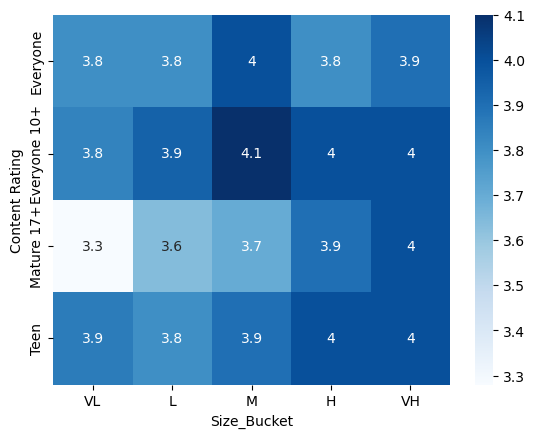

In [87]:
# Plot a heat map 
sns.heatmap(matrix,annot=True,cmap="Blues")
plt.show()

# Line Charts

#### Analyse the "Rating" By Months

In [88]:
data["Last Updated"].head()

0     January 7, 2018
1    January 15, 2018
2      August 1, 2018
3        June 8, 2018
4       June 20, 2018
Name: Last Updated, dtype: object

In [89]:
# Creating new columns from "Last Updated" column
data["updated_day"]=pd.DatetimeIndex(data["Last Updated"]).day
data["updated_month"]=pd.DatetimeIndex(data["Last Updated"]).month
data["updated_year"]=pd.DatetimeIndex(data["Last Updated"]).year

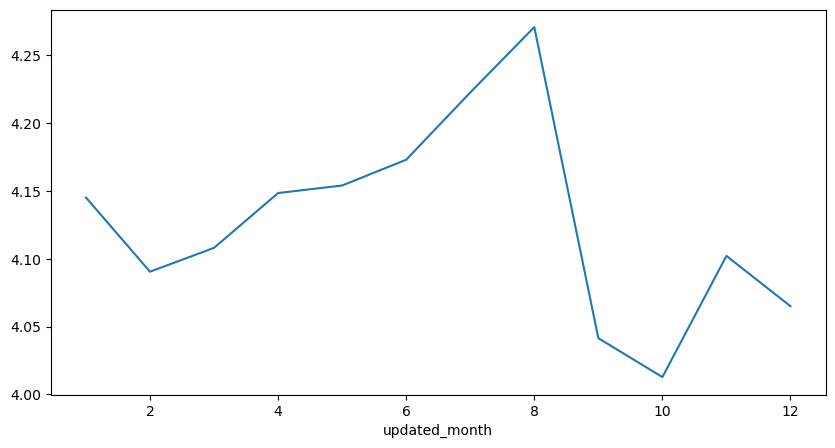

In [90]:
## Plot a line graph
plt.figure(figsize=[10,5])
data.groupby(['updated_month'])['Rating'].mean().plot()
plt.show()

Though not quite significant, there is indeed some improvement in the ratings during the months of July-August. Note that, here, we have assumed the Last Updated month to be the one in which all the reviews and ratings are coming from the users.

# Stacked Bar Charts

A stacked bar chart breaks down each bar of the bar chart on the basis of a different category

#### "updated_month" Vs "Content Rating" Vs "Installs"

In [129]:
# Create a pivot table for Content Rating and updated Month with the values set to Installs
data.pivot_table(index="updated_month",columns="Content Rating",values="Installs",aggfunc="sum")

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
updated_month,,,,
1,725387390,105282000,9701210,44159010
2,545372005,19821000,13021500,39597710
3,695365520,30322510,9111100,79850310
4,973371180,23300000,5259000,161619410
5,1461067800,118173500,50140100,202689600
6,2127170505,217727100,145257200,415716600
7,6371109680,456556000,419491910,1143556800
8,4430943320,215821000,312981700,1057855650
9,260340410,24931100,2201010,22483100


In [93]:
# Store the matrix table in a separate variable

monthly=data.pivot_table(index="updated_month",columns="Content Rating",values="Installs",aggfunc="sum")

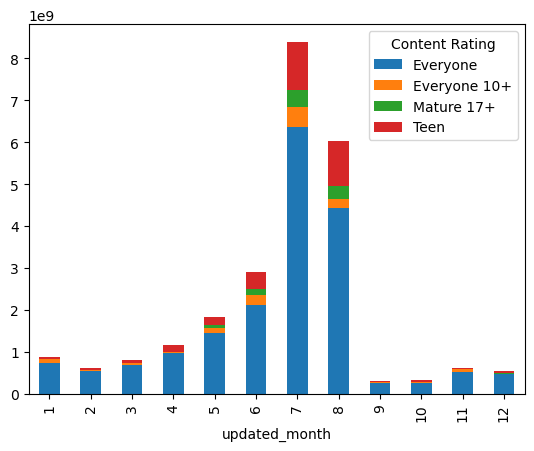

In [94]:
# Plot the stacked bar chart.
monthly.plot(kind="bar",stacked=True)
plt.show()

Here, even though you can say that the months June-Aug has the highest number of installs, it is quite difficult to infer anything about the different Content Rating categories. 

To overcome this, lets set all of the different types( Content Rating)of installs in proportion to their monthly installs:

In [95]:
##Plot the stacked bar chart again wrt to the proportions.
monthly[["Everyone","Everyone 10+","Mature 17+","Teen"]].apply(lambda x:x/x.sum(),axis=1)

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
updated_month,,,,
1,0.820083,0.119026,0.010968,0.049924
2,0.882747,0.032083,0.021077,0.064093
3,0.853576,0.037222,0.011184,0.098018
4,0.836553,0.020025,0.004520,0.138902
5,0.797495,0.064503,0.027368,0.110634
6,0.732025,0.074927,0.049987,0.143061
7,0.759305,0.054412,0.049995,0.136288
8,0.736330,0.035865,0.052011,0.175794
9,0.839928,0.080434,0.007101,0.072537


In [96]:
monthly_perc=monthly[["Everyone","Everyone 10+","Mature 17+","Teen"]].apply(lambda x:x/x.sum(),axis=1)

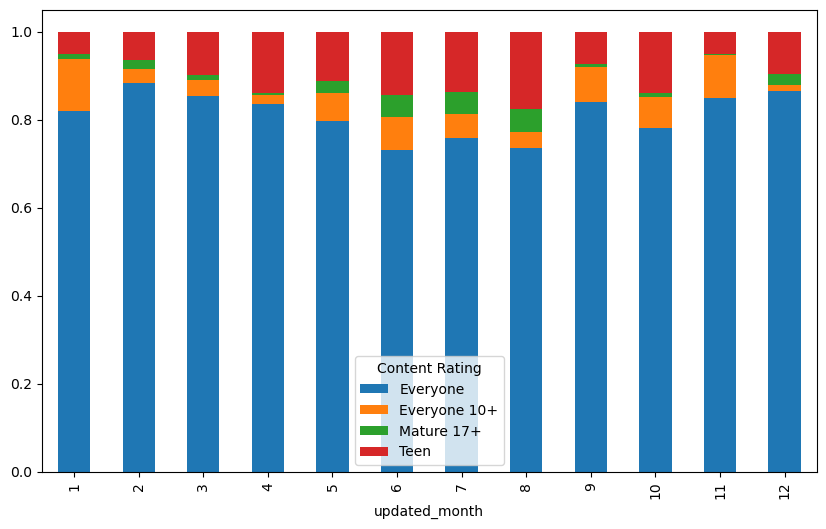

In [133]:
monthly_perc.plot(kind="bar",stacked="True",figsize=(10,6))
plt.show()

# Case Study Summary

Summary of case study:

- First, we did a fair bit of data handling and cleaning - cleaning junk records, adding missing values, changing data types,     remove outliers, etc.
- When we analysed the ratings using the histogram, you saw that they are skewed towards higher ratings.
- Using a bar chart, we saw that most of the apps belong to the Everyone category.
- We also observed a weak trend between the ratings and the size of the app, using a scatter-plot. We also briefly forayed to     reg plots to understand its nuances.
- Using a pair-plot, we were able to see multiple scatter plots and draw several inferences, for example, price and rating       having very weak trend, reviews and price being inversely related and so on.
- After that, we utilised estimator functions along with bar plots as well as box plots to observe the spread of ratings across   the different Content Rating Categories. Here, our main observation was that Everyone category has a lot of apps having very   low ratings.
- Finally, we created a heat map comparing the ratings across different Reviews and Content Rating buckets.